<a href="https://colab.research.google.com/github/Mbacanudo/prediccion_ventas/blob/main/Prediccion_de_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de ventas

### I.- Análisis Exploratorio

Diccionario de datos para este conjunto de datos:

| Nombre de la variable     | Descripción                                                                                                        |
|---------------------------|--------------------------------------------------------------------------------------------------------------------|
| Item_Identifier           | Identificación única del producto                                                                                  |
| Item_Weight               | Peso del producto                                                                                                  |
| Item_Fat_Content          | Si el producto es bajo en grasa o regular                                                                          |
| Item_Visibility           | Porcentaje de la superficie total de exposición de todos los productos de una tienda asignada al producto concreto |
| Item_Type                 | Categoría a la que el producto pertenece                                                                           |
| Item_MRP                  | Precio máximo de venta al público (precio de catálogo) del producto                                                |
| Outlet_Identifier         | Identificación única de la tienda                                                                                  |
| Outlet_Establishment_Year | El año en que se estableció la tienda                                                                              |
| Outlet_Size               | El tamaño de la tienda en cuanto al área total                                                                     |
| Outlet_Location_Type      | El tipo de área donde se encuentra la tienda                                                                       |
| Outlet_Type               | Si el punto de venta es una tienda de comestibles o algún tipo de supermercado                                     |
| Item_Outlet_Sales         | Ventas del producto en una tienda particular. Es la variable objetivo a predecir.                                  |

#### Manipulación de datos

Importamos los archivos que utilizaremos para realizar una predicción de ventas y revisamos los datos cargados.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

file = '/content/sales_predictions_2023.csv'
df = pd.read_csv(file)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [23]:
# Revisamos el tamaño del dataset
df.shape

(8523, 12)

In [24]:
# Revisamos el tipo de dato, la cantidad de filas totales e identificamos las columnas que tienen menos valores comparados con el total de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [25]:
# Comprobamos si existen duplicados
df.duplicated().sum()

0

In [26]:
# Observamos la cantidad de valores NaN por cada columna
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

En este caso vemos que hay datos faltantes en las columnas "Item_Weight" y "Outlet_Size"

In [27]:
df["Item_Weight"].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

En este caso vemos que son datos numericos

In [28]:
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

En la columna "Outlet_Size" vemos que el tipo de datos es ordinal

In [ ]:
# En el caso del peso de cada item, al no ser tan relevante para nuestro análisis de predicción de ventas reemplazaremos los valores faltantes por el promedio de todos los productos
#df["Item_Weight"].fillna(df["Item_Weight"].mean(), inplace=True)

In [ ]:
# En el caso de los datos faltantes para la columna de "Outlet_Size" seran reemplazados y se indicaran como dato faltante o "Missing Value".
# De cualquier forma por el momento no se considera relevante esta columna para el análisis.
#df['Outlet_Size'].fillna("Missing Value", inplace=True)

In [ ]:
# Una vez reemplazados los valores revisaremos el dataset para ver que los cambios se encuentren OK
#df.isna().sum()

In [29]:
df[["Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year","Item_Outlet_Sales"]].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Conclusiones Intermedias**:

#### Visualizaciones

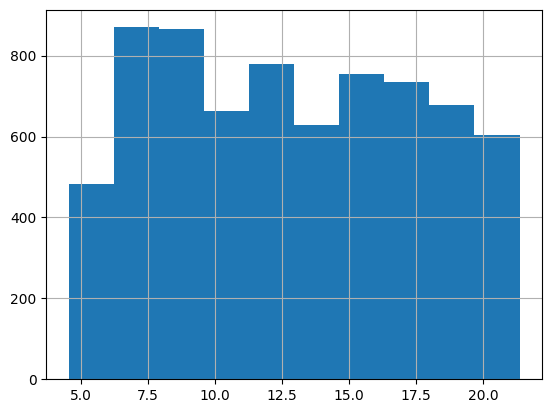

In [30]:
# Histogramas de caracteristicas del Dataset
df["Item_Weight"].hist();

<Axes: >

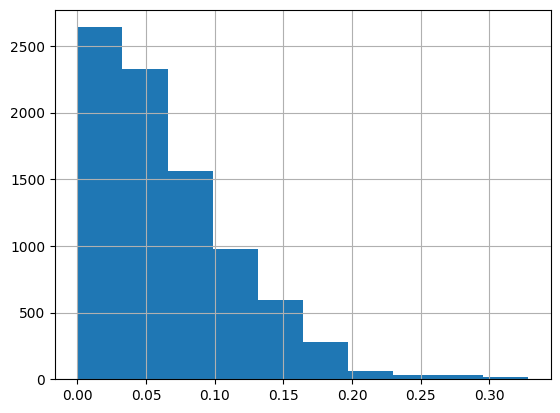

In [31]:
df["Item_Visibility"].hist()

<Axes: >

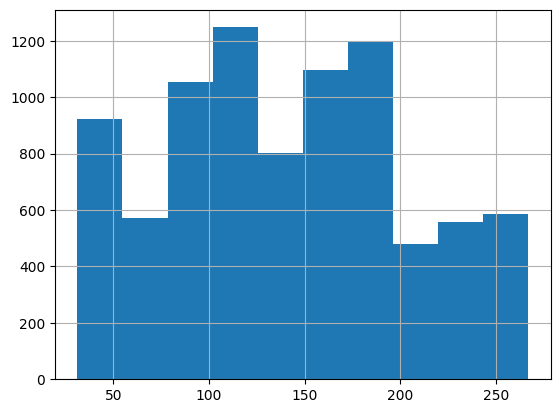

In [32]:
df["Item_MRP"].hist()

<Axes: >

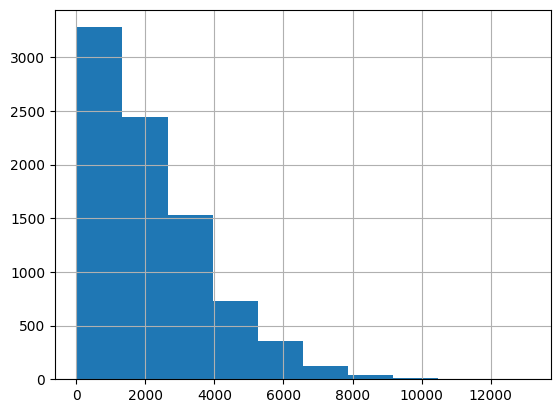

In [33]:
df["Item_Outlet_Sales"].hist()

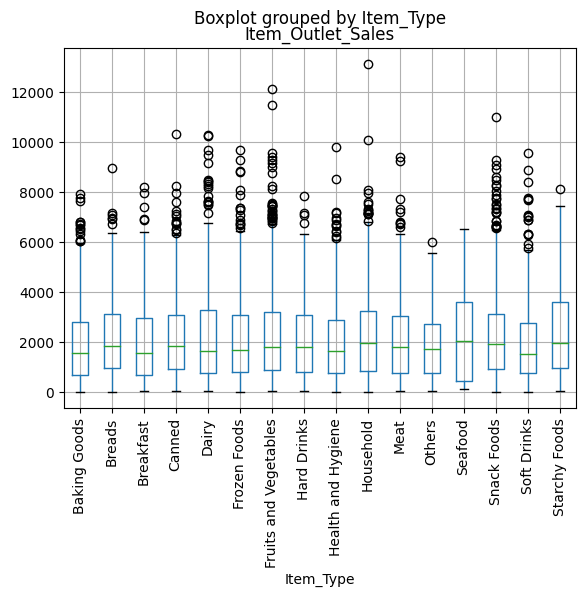

In [34]:
# Boxplot
df.boxplot(column = 'Item_Outlet_Sales', by = 'Item_Type'); #Item_Type
plt.xticks(rotation = 90);

In [35]:
# Mapa de calor de la correlación entre las características
df_caract = df[["Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year","Item_Outlet_Sales"]]
df_corr = df_caract.corr()

<Axes: >

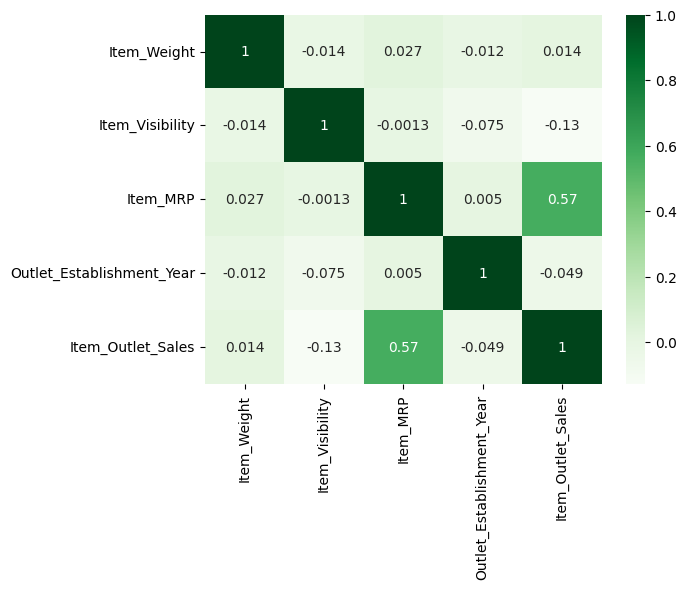

In [36]:
sns.heatmap(df_corr, cmap = "Greens", annot = True)

Podemos ver una clara relacion entre las caracteristicas de "Item_MRP" y "Item_Outlet_Sales" que aclaremos en profundidad mas adelante

In [37]:
# Identificamos la columna objetivo y realizamos un train_test_split para preparar el conjunto de datos
X = df.drop(columns=["Item_Outlet_Sales"])
y = df["Item_Outlet_Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [38]:
# Generamos los selectores segun tipo de columna
cat_selector = make_column_selector(dtype_include="object")
num_selector = make_column_selector(dtype_include="number")

In [52]:
# Creamos los imputers para el conjunto de datos, en este caso se rellenaran los datos perdidos categoricos como "most_frequent" y para los numericos por "mean" o media
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Escalado de datos
scaler = StandardScaler()
# OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [53]:
# Pipeline de datos numericos
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [54]:
# Pipeline de datos categoricos
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [55]:
# Generamos las tuplas de los datos numericos y categoricos para llevarlos al preprocesamiento
num_tuple = (numeric_pipe, num_selector)
cat_tuple = (categorical_pipe, cat_selector)

# Aplicamos el preprocessor con ambas tuplas

preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7a30ef3656f0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7a30ef365630>)])

In [56]:
# Realizamos el fit a los datos de entrenamiento

preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7a30ef3656f0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7a30ef365630>)])

In [57]:
# Aplicamos el preprocesamiento a los datos de entrenamiento y prueba

X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [59]:
# Revisamos los datos nulos para ambos conjuntos

print(np.isnan(X_train_processed).sum().sum(), "datos faltantes para el conjunto de entrenamiento")
print(np.isnan(X_test_processed).sum().sum(), "datos faltantes para el conjunto de prueba")
print("\n")
print("Tipo de datos de X_train: ", X_train_processed.dtype)
print("Tipo de datos de X_test: ", X_test_processed.dtype)

0 datos faltantes para el conjunto de entrenamiento
0 datos faltantes para el conjunto de prueba


Tipo de datos de X_train:  float64
Tipo de datos de X_test:  float64
